# Problem setting


A polling institute wants to be able to estimate an individual’s income from his/her personal data (see einkommen.train).
To this aim, 30.000 individuals were interviewed concerning the features summarized below. For some of the individuals, not all features are available. Crucially, the income of only 5.000 of the interviewee’s is known.
Your task is to predict the income group of the remaining 25.000 interviewees and to
prepare the data such that they can be used for further regression and correlation analyses.

• Age

• Employment type (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,
State-gov, Without-pay, Never-worked)

• Weighting factor to compensate for an interview-dependent selection bias

• Level of education (Bachelors, Some-college, HS-grad, Prof-school, Assoc-acdm, Assoc-
voc, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th, Masters, Doctorate, Preschool)

• Schooling/training period

• Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse)

• Employment area (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-ﬁshing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)

• Partnership (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)

• Ethnicity (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)

• Gender (Female, Male)

• Gains on ﬁnancial assets

• Losses on ﬁnancial assets

• Weekly working time

• Country of birth (United-States, Cambodia, England, Puerto-Rico, Canada, Ger-
many, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba,
Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ire-
land, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hun-
gary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trina-
dad&Tobago, Peru, Hong Kong, Holand-Netherlands)

• Income (≤ 50k, > 50k)

## Introduce the Data

Task: Given attributes about a person, predict whether their income is <=50K or >50K

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Import data and take a look
df = pd.read_csv('einkommen.train', names=['age','emplot-type','weight-factor',
                                           'level-edu','train-period','marital-statu',
                                           'employ-area','partnership','ethnicity',
                                           'gender','gains','losses','weekwtime',
                                           'country','income'])

df.head()

,age,emplot-type,weight-factor,level-edu,train-period,marital-statu,employ-area,partnership,ethnicity,gender,gains,losses,weekwtime,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# the income of only 5.000 of the interviewee’s is known. so we drop all
# 25.000 interviewees.
df_train=df.drop(i for i in range(5000, 30000))


In [4]:
df_train.head()

,age,emplot-type,weight-factor,level-edu,train-period,marital-statu,employ-area,partnership,ethnicity,gender,gains,losses,weekwtime,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 15 columns):
age              5000 non-null int64
emplot-type      5000 non-null object
weight-factor    5000 non-null int64
level-edu        5000 non-null object
train-period     5000 non-null int64
marital-statu    5000 non-null object
employ-area      5000 non-null object
partnership      5000 non-null object
ethnicity        5000 non-null object
gender           5000 non-null object
gains            5000 non-null int64
losses           5000 non-null int64
weekwtime        5000 non-null int64
country          5000 non-null object
income           5000 non-null object
dtypes: int64(6), object(9)
memory usage: 625.0+ KB


In [6]:
# Take a look at the outcome variable: 'income'
print(df_train['income'].value_counts())

 <=50K    3779
 >50K     1221
Name: income, dtype: int64


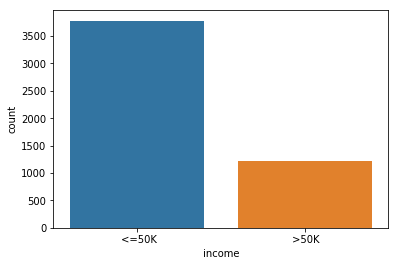

In [7]:
# Ploting the distribution of the income in the bar plot
sns.countplot(x='income', data=df_train);

## Exploring the data

Lets now explore the data with few visualizations.

In [8]:
# Assign outcome as 0 if income <=50K and as 1 if income >50K
df_train['income'] = [0 if x == ' <=50K' else 1 for x in df_train['income']]

# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df_train.drop('income', 1)
y = df_train.income

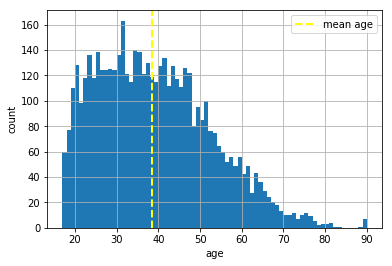

In [9]:
# Age distribution
ages = X['age'].hist(bins=max(X['age'])-min(X['age']))
mean_val = np.mean(X['age'])
plt.axvline(mean_val, linestyle='dashed', linewidth=2, color='yellow', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

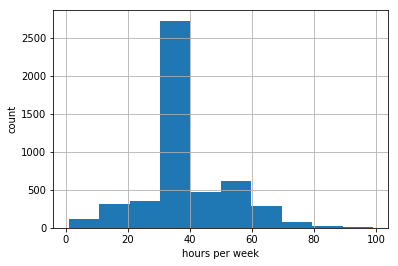

In [10]:
X['weekwtime'].hist()
plt.xlabel('hours per week')
plt.ylabel('count')
plt.show()

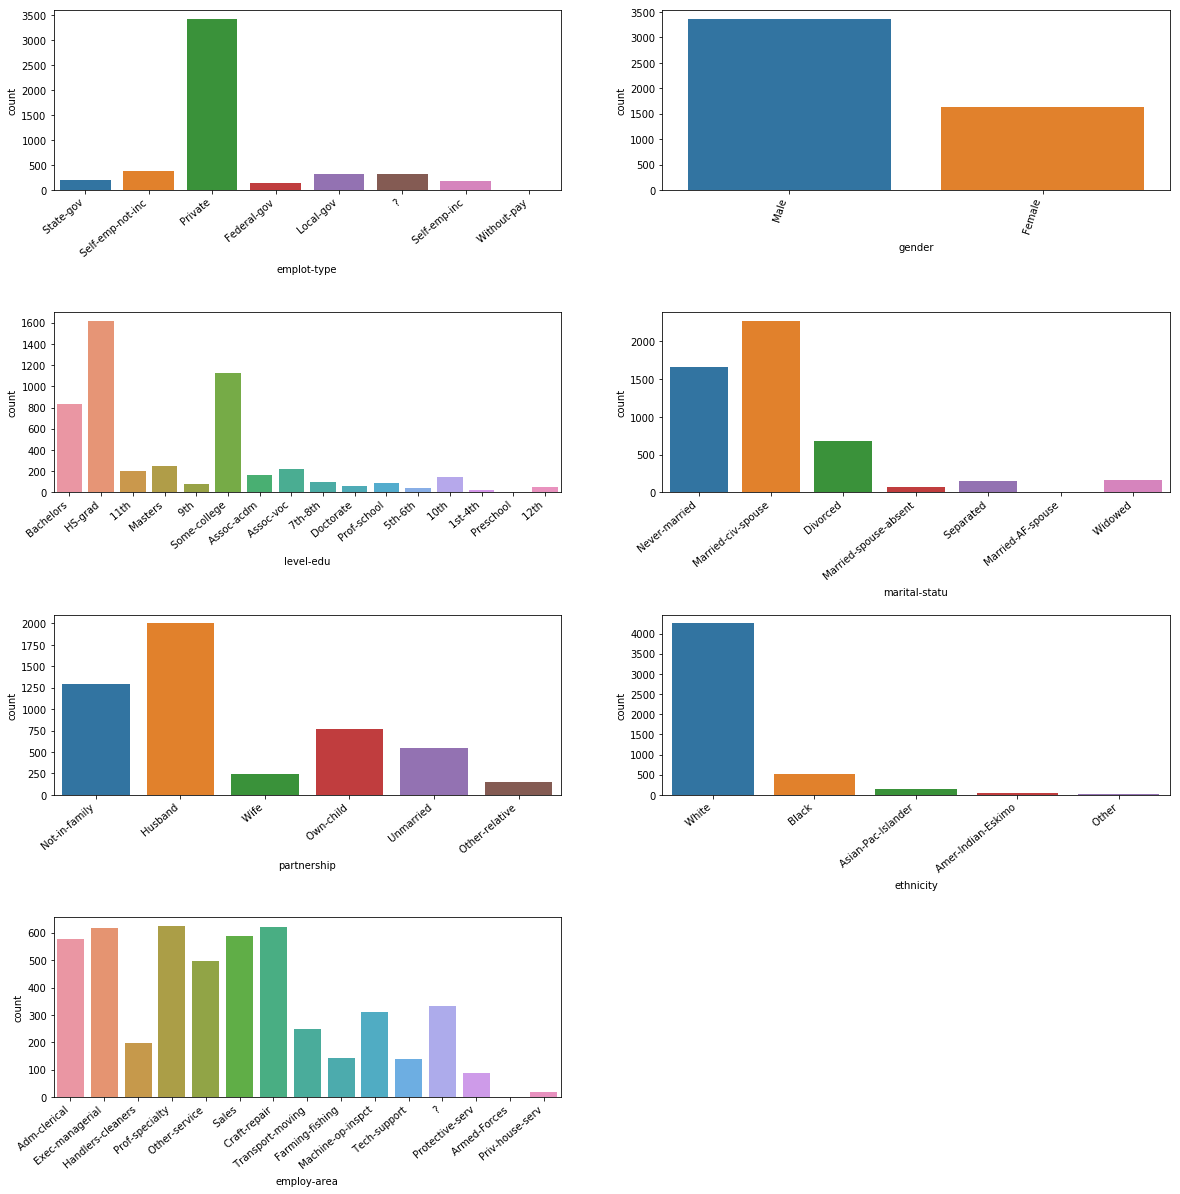

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(hspace=0.68)
fig.delaxes(axs[3][1])

# Employment type
wc_plot = sns.countplot(X['emplot-type'], ax=axs[0][0])
wc_plot.set_xticklabels(wc_plot.get_xticklabels(), rotation=40, ha="right")

# Gender
ge_plot = sns.countplot(X['gender'], ax=axs[0][1])
ge_plot.set_xticklabels(ge_plot.get_xticklabels(), rotation=72, ha="right")

# Education level
ed_plot = sns.countplot(X['level-edu'], ax=axs[1][0])
ed_plot.set_xticklabels(ed_plot.get_xticklabels(), rotation=40, ha="right")

# Marital status
ms_plot = sns.countplot(X['marital-statu'], ax=axs[1][1])
ms_plot.set_xticklabels(ms_plot.get_xticklabels(), rotation=40, ha="right")

# Relationship
rel_plot = sns.countplot(X['partnership'], ax=axs[2][0])
rel_plot.set_xticklabels(rel_plot.get_xticklabels(), rotation=40, ha="right")

# Race
race_plot = sns.countplot(X['ethnicity'], ax=axs[2][1])
race_plot.set_xticklabels(race_plot.get_xticklabels(), rotation=40, ha="right")

# Occupation
occ_plot = sns.countplot(X['employ-area'], ax=axs[3][0])
occ_plot.set_xticklabels(occ_plot.get_xticklabels(), rotation=40, ha="right")

plt.show()

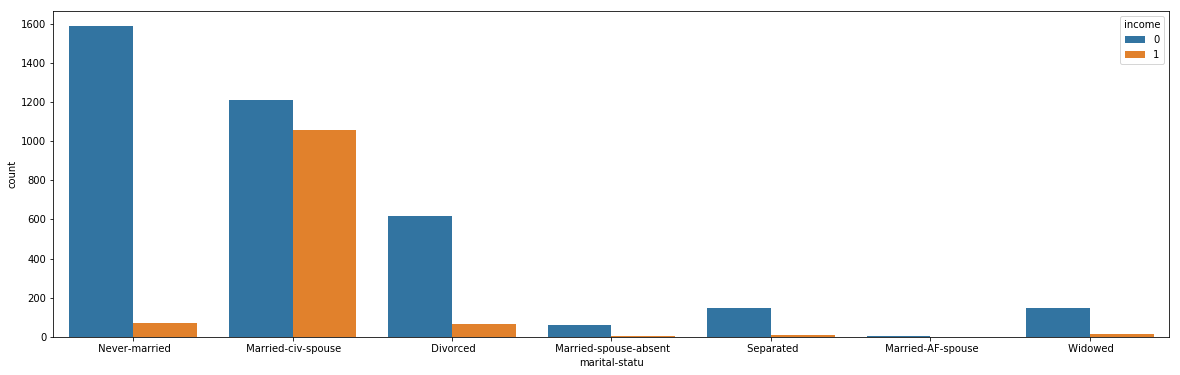

In [12]:
plt.figure(figsize=(20, 6))
sns.countplot(X['marital-statu'], hue=df_train['income'])
plt.show()

Inferences:

* Married citizens with spouse have higher chances of earning more than those who're unmarried/divorced/widowed/separated.
* A good marital relationship is also a key for earning more money.
* Males on an average make earn more than females.
* Higher Education can lead to higher income in most cases.
* Statistically (only), the Whites are always advantageous in salary.

## Data cleaning

### Handling Missing categorie

In [13]:
# Handling Missing categorie by Replacing him by other categorie
print(df_train['emplot-type'].value_counts())

 Private             3435
 Self-emp-not-inc     383
 ?                    331
 Local-gov            329
 State-gov            193
 Self-emp-inc         182
 Federal-gov          146
 Without-pay            1
Name: emplot-type, dtype: int64


In [14]:
X['emplot-type'] = [' Other-emplot-type' if x == ' ?' else x for x in X['emplot-type']]

In [15]:
print(X['emplot-type'].value_counts())

 Private              3435
 Self-emp-not-inc      383
 Other-emplot-type     331
 Local-gov             329
 State-gov             193
 Self-emp-inc          182
 Federal-gov           146
 Without-pay             1
Name: emplot-type, dtype: int64


In [16]:
print(df_train['employ-area'].value_counts())

 Prof-specialty       625
 Craft-repair         619
 Exec-managerial      618
 Sales                588
 Adm-clerical         576
 Other-service        495
 ?                    331
 Machine-op-inspct    312
 Transport-moving     247
 Handlers-cleaners    196
 Farming-fishing      143
 Tech-support         140
 Protective-serv       90
 Priv-house-serv       18
 Armed-Forces           2
Name: employ-area, dtype: int64


In [17]:
X['employ-area'] = [' Other-employ-area' if x == ' ?' else x for x in X['employ-area']]

In [18]:
print(X['employ-area'].value_counts())

 Prof-specialty       625
 Craft-repair         619
 Exec-managerial      618
 Sales                588
 Adm-clerical         576
 Other-service        495
 Other-employ-area    331
 Machine-op-inspct    312
 Transport-moving     247
 Handlers-cleaners    196
 Farming-fishing      143
 Tech-support         140
 Protective-serv       90
 Priv-house-serv       18
 Armed-Forces           2
Name: employ-area, dtype: int64


### Dealing with data types

Models can only handle numeric features
Must convert categorical and ordinal features into numeric features



In [19]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories"
              .format(col_name=col_name, unique_cat=unique_cat))

Feature 'emplot-type' has 8 unique categories
Feature 'level-edu' has 16 unique categories
Feature 'marital-statu' has 7 unique categories
Feature 'employ-area' has 15 unique categories
Feature 'partnership' has 6 unique categories
Feature 'ethnicity' has 5 unique categories
Feature 'gender' has 2 unique categories
Feature 'country' has 40 unique categories


In [20]:
# Although, 'country' has a lot of unique categories,
# most categories only have a few observations
print(X['country'].value_counts().sort_values(ascending=False).head(10))

 United-States    4465
 Mexico            104
 ?                  97
 Canada             28
 Germany            22
 Philippines        22
 England            16
 El-Salvador        16
 Puerto-Rico        16
 Jamaica            15
Name: country, dtype: int64


In [21]:
# In this case, bucket low frequecy categories as "Other"
X['country'] = ['United-States ' if x == ' United-States' else 'Other' for x in X['country']]

print(X['country'].value_counts().sort_values(ascending=False))

United-States     4465
Other              535
Name: country, dtype: int64


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
age              5000 non-null int64
emplot-type      5000 non-null object
weight-factor    5000 non-null int64
level-edu        5000 non-null object
train-period     5000 non-null int64
marital-statu    5000 non-null object
employ-area      5000 non-null object
partnership      5000 non-null object
ethnicity        5000 non-null object
gender           5000 non-null object
gains            5000 non-null int64
losses           5000 non-null int64
weekwtime        5000 non-null int64
country          5000 non-null object
dtypes: int64(6), object(8)
memory usage: 745.9+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col_name in X.columns:
        if X[col_name].dtypes == 'object':
            X[col_name]=le.fit_transform(X[col_name])

In [26]:
X.head()

,age,emplot-type,weight-factor,level-edu,train-period,marital-statu,employ-area,partnership,ethnicity,gender,gains,losses,weekwtime,country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,1
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,1
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,1
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,1
4,28,3,338409,9,13,2,10,5,2,0,0,0,40,0


### Handling missing data

An alternative solution is to use imputation
    - Replace missing value with another value
    - Strategies: mean, median, highest frequency value of given feature

In [27]:
# How much of your data is missing?
X.isnull().sum().sort_values(ascending=False).head()

# Confirm All Missing Data is Handled

country      0
weekwtime    0
losses       0
gains        0
gender       0
dtype: int64

In [28]:
# Impute missing values using Imputer in sklearn.preprocessing
#from sklearn.preprocessing import Imputer

#imp = Imputer(missing_values='NaN', strategy='median', axis=0)
#imp.fit(X)
#X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

##  Model building

### Build model using processed data

In [29]:
# Importing objects from sklearn to help with the predictions.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, 
                            recall_score, confusion_matrix,
                            precision_recall_curve

In [31]:
# Use train_test_split in sklearn.cross_validation
# to split data into train and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    train_size=0.70, random_state=1)

C:\Users\awdii\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
# Creating a confusion matrix.
def CMatrix(CM, labels=['<=50K','>50K']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['TOTAL'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [33]:
# Preparing a pandas DataFrame to analyze models (evaluation metrics).
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'],
                        columns=['NULL','LogisticReg','ClassTree','RandomForest'])

## The Null Model : Always predict the most common category

In [34]:
#######################
# The Null Model.
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)
accuracy_score(y_pred=y_pred_test, y_true=y_test)

C:\Users\awdii\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.766

In [35]:
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,<=50K,>50K,Total
TRUE,,,
<=50K,1149,0,1149
>50K,351,0,351
TOTAL,1500,0,1500


##  A. Logistic Regression.

In [36]:
# A. Logistic Regression.
# 1- Import the estimator object (model).
from sklearn.linear_model import LogisticRegression

# 2- Create an instance of the estimator.
logistic_regression = LogisticRegression()

# 3- Use the trainning data to train the estimator.
logistic_regression.fit(X_train, y_train)

# 4- Evaluate the model.
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)

# Confusion Matrix.
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,<=50K,>50K,Total
TRUE,,,
<=50K,1103,46,1149
>50K,250,101,351
TOTAL,1353,147,1500


## B. Classification Trees.

In [37]:
# B. Classification Trees.
# 1- Import the estimator object (model).
from sklearn.tree import DecisionTreeClassifier

# 2- Create an instance of the estimator.
class_tree = DecisionTreeClassifier(min_samples_split=30,
                                    min_samples_leaf=10, random_state=10)

# 3- Use the trainning data to train the estimator.
class_tree.fit(X_train, y_train)

# 4- Evaluate the model.
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)

# Confusion Matrix.
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,<=50K,>50K,Total
TRUE,,,
<=50K,1056,93,1149
>50K,158,193,351
TOTAL,1214,286,1500


## C. Random Forest Classifier

In [38]:
# C. Random Forest Classifier.
# 1- Import the estimator object (model).
from sklearn.ensemble import RandomForestClassifier


# 2- Create an instance of the estimator.
random_forest = RandomForestClassifier()

# 3- Use the trainning data to train the estimator.
random_forest.fit(X_train, y_train)

# 4- Evaluate the model.
y_pred_test = random_forest.predict(X_test)
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)

# Confusion Matrix.
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,<=50K,>50K,Total
TRUE,,,
<=50K,1060,89,1149
>50K,139,212,351
TOTAL,1199,301,1500


In [39]:
#######################
# Comparing the models with percentages.
100*metrics

,NULL,LogisticReg,ClassTree,RandomForest
accuracy,76.6,80.2667,83.2667,84.8
precision,0,68.7075,67.4825,70.4319
recall,0,28.7749,54.9858,60.3989


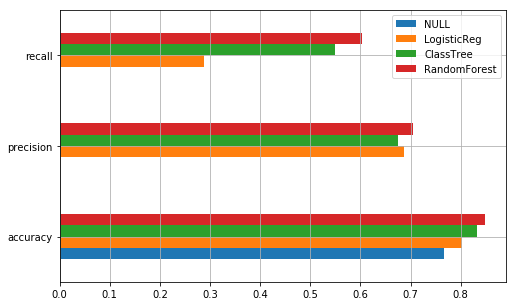

In [40]:
# Comparing the models with a bar graph.
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

In [41]:
# Adjusting the precision and recall values for the logistic regression model

precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test,
                    probas_pred=logistic_regression.predict_proba(X_test)[:,1])


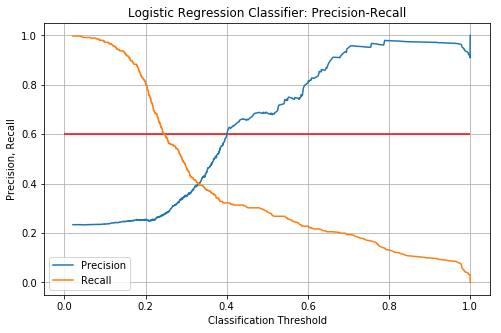

In [42]:
# Creating a confusion matrix for modified Logistic Regression Classifier.
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr[1:], label='Precision')
ax.plot(thresholds_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='r')
ax.legend()
ax.grid();

## Adjusting the threshold to 0.2.

In [43]:
# Adjusting the threshold to 0.2.
y_pred_proba = logistic_regression.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.2).astype('int')

# Confusion Matrix.
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print('Recall: ', str(100*recall_score(y_pred=y_pred_test, y_true=y_test)) + '%')
print('Precision: ', str(100*precision_score(y_pred=y_pred_test, y_true=y_test)) + '%')
CMatrix(CM)

Recall:  80.91168091168092%
Precision:  25.47085201793722%


PREDICTION,<=50K,>50K,Total
TRUE,,,
<=50K,318,831,1149
>50K,67,284,351
TOTAL,385,1115,1500


We can see that Maritial statues, Working Hours and Sex really matters if you want to earn more than 50K per year. In contrary, the working class is not that important. Generally speaking, you will get equal opportunity if you work hard enough, no matter what kinds of job are you doing.

## Prediction

predict the income group of the remaining 25.000 interviewees

In [44]:
df_new=df.drop(i for i in range(0, 5000))

In [45]:
Xnew = df_new.drop('income', 1)

In [46]:
# Although, 'country' has a lot of unique categories,
# most categories only have a few observations
print(Xnew['country'].value_counts().sort_values(ascending=False).head(10))

 United-States    22406
 Mexico             498
 ?                  442
 Philippines        155
 Germany            100
 Puerto-Rico         96
 Canada              87
 India               82
 El-Salvador         80
 Cuba                73
Name: country, dtype: int64


In [47]:
# In this case, bucket low frequecy categories as "Other"
Xnew['country'] = ['United-States ' if x == ' United-States' else 'Other' for x in Xnew['country']]

print(Xnew['country'].value_counts().sort_values(ascending=False))

United-States     22406
Other              2594
Name: country, dtype: int64


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col_name in Xnew.columns:
        if Xnew[col_name].dtypes == 'object':
            Xnew[col_name]=le.fit_transform(Xnew[col_name])

In [49]:
ynew = random_forest.predict(Xnew)

In [50]:
df_new['income']=ynew

In [53]:
df_new.head()

,age,emplot-type,weight-factor,level-edu,train-period,marital-statu,employ-area,partnership,ethnicity,gender,gains,losses,weekwtime,country,income
5000,47,Self-emp-inc,79627,Prof-school,15,Divorced,Prof-specialty,Not-in-family,White,Male,27828,0,50,United-States,1
5001,55,Private,151474,Bachelors,13,Never-married,Tech-support,Other-relative,White,Female,0,1590,38,United-States,0
5002,26,Private,132661,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,5013,0,40,United-States,0
5003,28,Private,161674,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,0
5004,36,Private,62346,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States,0


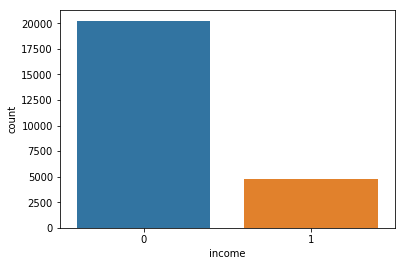

In [52]:
# Ploting the distribution of the income in the bar plot
sns.countplot(x='income', data=df_new);